# EDA

In [171]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split # split data
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

import xgboost
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import os

In [172]:
df = pd.read_csv(r'C:\Users\Sebi-PC\Desktop\Project Python\Project3\Interviuri\imputation_test.csv')
df.head()

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
0,3,2010,4,53.0,540.0,6.322805,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,3,2010,5,53.0,541.0,6.510683,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,3,2010,6,53.0,542.0,6.696693,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,3,2010,7,53.0,543.0,6.967286,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,3,2010,8,53.0,544.0,6.966908,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


In [173]:
df.describe()

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
count,318240.000000,318240.000000,318240.000000,316090.000000,316090.000000,318240.000000,302820.000000,308410.000000,309330.000000,309300.000000,...,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,224530.000000
mean,23681.297480,2010.500000,6.000000,38.459331,396.765019,6.378592,6.120997,6.121774,6.175623,6.383423,...,0.052643,0.093328,0.113670,0.123636,0.299946,0.133063,0.053877,0.030498,0.834699,7461.814813
std,13668.726916,0.500001,1.414216,19.374454,200.030749,0.631193,0.587306,0.580189,0.602595,0.617254,...,0.223321,0.290892,0.317411,0.329166,0.458235,0.339644,0.225775,0.171952,0.371453,4452.755768
min,3.000000,2010.000000,4.000000,1.000000,6.000000,3.913470,-0.200671,0.054521,-0.133531,1.585980,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11851.750000,2010.000000,5.000000,28.000000,286.000000,5.971690,5.748290,5.749722,5.791590,5.992229,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3934.000000
50%,23745.500000,2010.500000,6.000000,42.000000,433.000000,6.422933,6.155237,6.166992,6.219686,6.436485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7209.000000
75%,35462.250000,2011.000000,7.000000,54.000000,553.000000,6.830913,6.533570,6.535842,6.603176,6.822698,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,10542.000000
max,47356.000000,2011.000000,8.000000,76.000000,841.000000,8.457375,7.988367,7.883420,7.917382,8.042931,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20000.000000


In [174]:
df.isnull().sum() # We explore if there are any missing data beside size

hh_id              0
year               0
month              0
zipcode         2150
mozip           2150
lusage             0
luse1          15420
luse2           9830
luse3           8910
luse4           8940
luse5           8940
luse6           8810
children        2150
hhsize2            0
hhsize3            0
hhsize4            0
hhsize5            0
hhsize5plus        0
income2         2150
income3         2150
income4         2150
income5         2150
income6         2150
income7         2150
income8         2150
income9         2150
owner           2150
size           93710
dtype: int64

In [175]:
# We can notice there are, however compared to size, the rest of the columns do not have a notable number of missing data

In [176]:
""" We have to fill the columns with missing values. For this we are going to use SimpleImputer from Scikit-Learn library. 
the SimpleImputer has some available parameters: we are going to use "mean" for continous variables and "most-frequent" for 
columns where the variable is categorical """


dfmean = [['luse1', 'luse2', 'luse3', 'luse4', 'luse5', 'luse6', 'lusage']]
dfcategorical =[['children', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner', 'hhsize2']]
dfmost_frequent = [['zipcode', 'mozip']]
size = df[['size']]
# selectbest = df[['lusage', 'luse3','luse4','luse5','luse6','hhsize2']]

In [177]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv(r'C:\Users\Sebi-PC\Desktop\Project Python\Project3\Interviuri\imputation_test.csv')
df= df[['luse1', 'luse2', 'luse3', 'luse4', 'luse5', 'luse6', 'lusage']]
# size = df[['size']]


imputer = SimpleImputer(strategy='mean')
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

df_imputed

,luse1,luse2,luse3,luse4,luse5,luse6,lusage
0,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.322805
1,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.510683
2,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.696693
3,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.967286
4,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.966908
...,...,...,...,...,...,...,...
318235,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,6.791299
318236,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,6.949129
318237,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,7.010714
318238,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,7.193545


In [178]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv(r'C:\Users\Sebi-PC\Desktop\Project Python\Project3\Interviuri\imputation_test.csv')
df2= df[['children', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner','zipcode', 'mozip', 
         'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus' ]]


imputer = SimpleImputer(strategy='most_frequent')
imputed = imputer.fit_transform(df2)
df_imputed2 = pd.DataFrame(imputed, columns=df2.columns)

df_imputed2

,children,income2,income3,income4,income5,income6,income7,income8,income9,owner,zipcode,mozip,hhsize2,hhsize3,hhsize4,hhsize5,hhsize5plus
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53.0,540.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53.0,541.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53.0,542.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53.0,543.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53.0,544.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.0,515.0,1.0,0.0,0.0,0.0,0.0
318236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.0,516.0,1.0,0.0,0.0,0.0,0.0
318237,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.0,517.0,1.0,0.0,0.0,0.0,0.0
318238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.0,518.0,1.0,0.0,0.0,0.0,0.0


In [179]:
# concatenating df3 and df4 along columns
horizontal_concat = pd.concat([df_imputed, df_imputed2], axis=1)
remained = [['lusage', 'hhsize2']]
dff= pd.concat([horizontal_concat, size], axis=1)
# dff = pd.concat([d123, remained], axis=1)

In [180]:
dff.head()

,luse1,luse2,luse3,luse4,luse5,luse6,lusage,children,income2,income3,...,income9,owner,zipcode,mozip,hhsize2,hhsize3,hhsize4,hhsize5,hhsize5plus,size
0,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.322805,1.0,0.0,0.0,...,0.0,1.0,53.0,540.0,0.0,0.0,1.0,0.0,0.0,NaN
1,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.510683,1.0,0.0,0.0,...,0.0,1.0,53.0,541.0,0.0,0.0,1.0,0.0,0.0,NaN
2,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.696693,1.0,0.0,0.0,...,0.0,1.0,53.0,542.0,0.0,0.0,1.0,0.0,0.0,NaN
3,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.967286,1.0,0.0,0.0,...,0.0,1.0,53.0,543.0,0.0,0.0,1.0,0.0,0.0,NaN
4,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.966908,1.0,0.0,0.0,...,0.0,1.0,53.0,544.0,0.0,0.0,1.0,0.0,0.0,NaN


In [181]:
# We check if the columns have been imputed.

In [182]:
dff.isnull().sum()

luse1              0
luse2              0
luse3              0
luse4              0
luse5              0
luse6              0
lusage             0
children           0
income2            0
income3            0
income4            0
income5            0
income6            0
income7            0
income8            0
income9            0
owner              0
zipcode            0
mozip              0
hhsize2            0
hhsize3            0
hhsize4            0
hhsize5            0
hhsize5plus        0
size           93710
dtype: int64

In [183]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318240 entries, 0 to 318239
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   luse1        318240 non-null  float64
 1   luse2        318240 non-null  float64
 2   luse3        318240 non-null  float64
 3   luse4        318240 non-null  float64
 4   luse5        318240 non-null  float64
 5   luse6        318240 non-null  float64
 6   lusage       318240 non-null  float64
 7   children     318240 non-null  float64
 8   income2      318240 non-null  float64
 9   income3      318240 non-null  float64
 10  income4      318240 non-null  float64
 11  income5      318240 non-null  float64
 12  income6      318240 non-null  float64
 13  income7      318240 non-null  float64
 14  income8      318240 non-null  float64
 15  income9      318240 non-null  float64
 16  owner        318240 non-null  float64
 17  zipcode      318240 non-null  float64
 18  mozip        318240 non-

<AxesSubplot: >

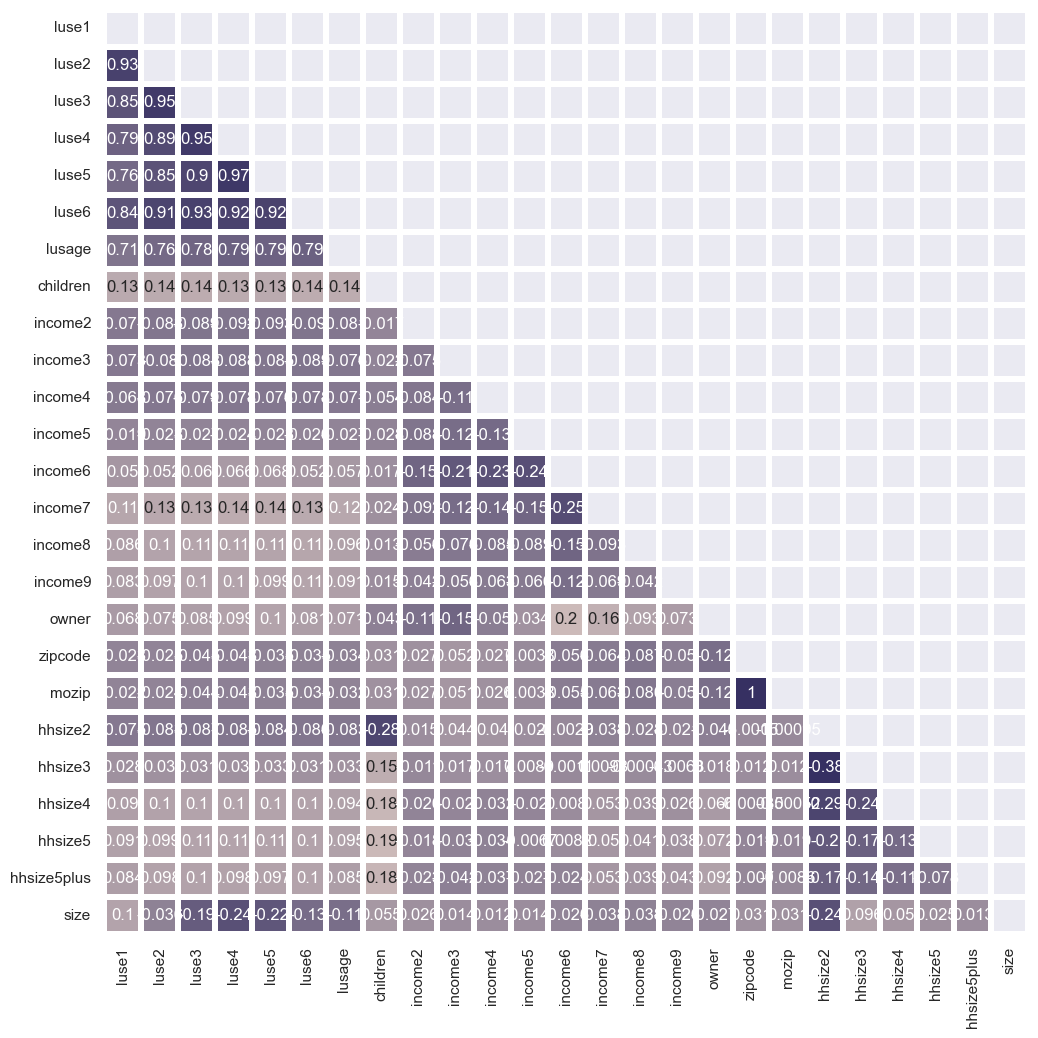

In [184]:
corr = dff[['mozip', 'lusage', 'luse1', 'luse2', 'luse3', 'luse4', 'luse5', 'luse6', 'children', 'hhsize2', 'hhsize3', 'hhsize4',
          'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner', 'size']]

plt.subplots(figsize = (12, 12))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",
                                                           ['#363062',
                                                            '#E9D5CA',
                                                            '#363062',
                                                           ])

mask = np.triu(np.ones_like(dff.corr() ))
sns.heatmap(dff.corr(),
            mask = mask,
            cmap = cmap,
            cbar = False,
            square = True,
            annot = True,
            linewidths = 3,
           )

In [185]:
reg_imputer = IterativeImputer(estimator=
                               xgboost.XGBRegressor(n_estimators=500, 
                                       tree_method='gpu_hist', 
                                       predictor='gpu_predictor',
                                       eval_metric='rmse'),
                               verbose=2,
                               max_iter=5)
dfpred = pd.DataFrame( reg_imputer.fit_transform(dff),columns = dff.columns)

[IterativeImputer] Completing matrix with shape (318240, 25)
[IterativeImputer] Ending imputation round 1/5, elapsed time 89.98
[IterativeImputer] Change: 17232.171514959722, scaled tolerance: 20.0 
[IterativeImputer] Ending imputation round 2/5, elapsed time 179.54
[IterativeImputer] Change: 0.0, scaled tolerance: 20.0 
[IterativeImputer] Early stopping criterion reached.


In [186]:
dfpred

,luse1,luse2,luse3,luse4,luse5,luse6,lusage,children,income2,income3,...,income9,owner,zipcode,mozip,hhsize2,hhsize3,hhsize4,hhsize5,hhsize5plus,size
0,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.322805,1.0,0.0,0.0,...,0.0,1.0,53.0,540.0,0.0,0.0,1.0,0.0,0.0,15526.598633
1,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.510683,1.0,0.0,0.0,...,0.0,1.0,53.0,541.0,0.0,0.0,1.0,0.0,0.0,15526.598633
2,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.696693,1.0,0.0,0.0,...,0.0,1.0,53.0,542.0,0.0,0.0,1.0,0.0,0.0,15526.598633
3,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.967286,1.0,0.0,0.0,...,0.0,1.0,53.0,543.0,0.0,0.0,1.0,0.0,0.0,15526.598633
4,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,6.966908,1.0,0.0,0.0,...,0.0,1.0,53.0,544.0,0.0,0.0,1.0,0.0,0.0,15526.598633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318235,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,6.791299,0.0,0.0,0.0,...,0.0,1.0,50.0,515.0,1.0,0.0,0.0,0.0,0.0,12490.000000
318236,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,6.949129,0.0,0.0,0.0,...,0.0,1.0,50.0,516.0,1.0,0.0,0.0,0.0,0.0,12490.000000
318237,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,7.010714,0.0,0.0,0.0,...,0.0,1.0,50.0,517.0,1.0,0.0,0.0,0.0,0.0,12490.000000
318238,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,7.193545,0.0,0.0,0.0,...,0.0,1.0,50.0,518.0,1.0,0.0,0.0,0.0,0.0,12490.000000


In [187]:
X = dfpred.drop(['zipcode', 'mozip'], axis=1)
y = dfpred[['size']]

#splitting the dataset in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)
mae_0 = mean_absolute_error(y_test,y_pred)
rmse_0 = np.sqrt(mean_squared_error(y_test,y_pred)) 
print("Root mean square error : ",rmse_0)
print("Mean absolute error : ",mae_0)

Root mean square error :  13.060963202906546
Mean absolute error :  9.756162753928024


In [ ]:
dfpred
dfpred.to_csv("Output.csv")